#### importing libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#### Importing and understanding the dataset

In [58]:
#reading the dataset : "Dataframe.csv"
df = pd.read_csv('./Datasets/DataFrame.csv') 

In [59]:
df.head(10)

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN
5,NIFTY,20210101,09:21,14016.00,14021.75,14006.40,14020.75,NaN
6,NIFTY,20210101,09:22,14020.70,14023.45,14018.70,14019.45,NaN
7,NIFTY,20210101,09:23,14018.40,14021.05,14017.45,14019.45,NaN
8,NIFTY,20210101,09:24,14020.00,14020.00,14007.60,14010.50,NaN
9,NIFTY,20210101,09:25,14010.25,14014.10,14007.30,14014.10,NaN


In [60]:
#let's get some infromation about the data features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Date        22805 non-null  int64  
 2   Time        22805 non-null  object 
 3   open        22805 non-null  float64
 4   high        22805 non-null  float64
 5   low         22805 non-null  float64
 6   close       22805 non-null  float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


##### Inshight : We can see that Unnamed column is useless so we better drop it 

In [61]:
df.drop(['Unnamed: 7'],axis=1,inplace=True) #inplace = true as we don't want to store it in another dataset

In [62]:
df.head() #to check wheather changes are reflected to the original dataset or not

,Type,Date,Time,open,high,low,close
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45


#### Data Description : 
Dataset features
- Type : NIFTY
- Date : Specific trading Date
- Time : Time of the trade
- Open : Opening price of the trade
- High : maximum price at particular time
- Low : minimum price at particular time
- Close : Closing price


- Total change - { Close - Open }

##### Type of the data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    22805 non-null  object 
 1   Date    22805 non-null  int64  
 2   Time    22805 non-null  object 
 3   open    22805 non-null  float64
 4   high    22805 non-null  float64
 5   low     22805 non-null  float64
 6   close   22805 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


##### Inshights : Date and Time is listed as int64 and object respectively, so we need to convert it into more readable type, but before we do it let's check out about the missing values and duplicates in the dataset

##### Finding about the missing values

In [64]:
df.isnull().values.any()

False

##### Inshight : False means there are no null values in the dataset 

##### Finding about the duplicates 

In [65]:
df[df.duplicated()]      

,Type,Date,Time,open,high,low,close


##### Inshight : So by looking at the output we can say there are no duplicates in our dataset.

##### Working with date and time column, it is very important in the data about the datetime that we add month, year, day, hour and other additional information to get better inshights

In [66]:
df['Date'] = dt = pd.to_datetime(df["Date"],format="%Y%m%d")

In [67]:
df.head()

,Type,Date,Time,open,high,low,close
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45


In [68]:
df["Year"] = df.Date.dt.year
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df["week"] = df.Date.dt.isocalendar().week
df.head(10)
# df.head(10000)

,Type,Date,Time,open,high,low,close,Year,month,day,day_of_week,week
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,53
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,53
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,53
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,53
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,53
5,NIFTY,2021-01-01,09:21,14016.00,14021.75,14006.40,14020.75,2021,1,1,4,53
6,NIFTY,2021-01-01,09:22,14020.70,14023.45,14018.70,14019.45,2021,1,1,4,53
7,NIFTY,2021-01-01,09:23,14018.40,14021.05,14017.45,14019.45,2021,1,1,4,53
8,NIFTY,2021-01-01,09:24,14020.00,14020.00,14007.60,14010.50,2021,1,1,4,53
9,NIFTY,2021-01-01,09:25,14010.25,14014.10,14007.30,14014.10,2021,1,1,4,53


In [69]:
# Important Note : The ISO definition for week 1 is the week with the first Thursday in it. Using the ISO week number may give unexpected results near the start and end of a year. 
# For instance, in above output 01/01/2021 falls in week 53 of year 2020.

In [70]:
# df.drop(["Date"], axis = 1, inplace = True)  #now we don't need date coulumn 

In [71]:
df.head()

,Type,Date,Time,open,high,low,close,Year,month,day,day_of_week,week
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,53
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,53
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,53
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,53
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,53


In [72]:
df["hour"] = pd.to_datetime(df["Time"]).dt.hour
df["min"] = pd.to_datetime(df["Time"]).dt.minute

In [73]:
df.head()

,Type,Date,Time,open,high,low,close,Year,month,day,day_of_week,week,hour,min
0,NIFTY,2021-01-01,09:16,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,53,9,16
1,NIFTY,2021-01-01,09:17,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,53,9,17
2,NIFTY,2021-01-01,09:18,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,53,9,18
3,NIFTY,2021-01-01,09:19,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,53,9,19
4,NIFTY,2021-01-01,09:20,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,53,9,20


In [74]:
df.drop(["Time"], axis = 1, inplace = True)

In [75]:
df.head()
#df.head(1000)

,Type,Date,open,high,low,close,Year,month,day,day_of_week,week,hour,min
0,NIFTY,2021-01-01,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,53,9,16
1,NIFTY,2021-01-01,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,53,9,17
2,NIFTY,2021-01-01,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,53,9,18
3,NIFTY,2021-01-01,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,53,9,19
4,NIFTY,2021-01-01,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,53,9,20


##### Calculating the change in percentage that occured since the opening 

In [76]:
df['change'] = df['close'] - df['open']
df['change_in_percentage'] =   round( (( (df['close'] - df['open'] ) / df['open'] ) * 100 ), 3)

In [77]:
df.head()
# df.head(1000)

,Type,Date,open,high,low,close,Year,month,day,day_of_week,week,hour,min,change,change_in_percentage
0,NIFTY,2021-01-01,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,53,9,16,15.25,0.109
1,NIFTY,2021-01-01,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,53,9,17,-5.80,-0.041
2,NIFTY,2021-01-01,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,53,9,18,4.65,0.033
3,NIFTY,2021-01-01,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,53,9,19,2.55,0.018
4,NIFTY,2021-01-01,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,53,9,20,0.00,0.000


##### Now that we have all the features in our data we need, we can describe our data

In [78]:
df.describe()

,open,high,low,close,Year,month,day,day_of_week,week,hour,min,change,change_in_percentage
count,22805.000000,22805.000000,22805.000000,22805.000000,22805.0,22805.000000,22805.000000,22805.000000,22805.000000,22805.000000,22805.00000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816,2021.0,2.016707,14.573339,2.016575,7.451962,11.911072,29.21298,-0.061581,-0.000409
std,391.377498,391.265231,391.551643,391.366248,0.0,0.824087,8.543913,1.427573,6.910606,1.867000,17.01660,7.063958,0.048197
min,13604.750000,13614.400000,13596.750000,13602.800000,2021.0,1.000000,1.000000,0.000000,1.000000,9.000000,0.00000,-109.100000,-0.732000
25%,14462.250000,14465.950000,14458.050000,14461.950000,2021.0,1.000000,8.000000,1.000000,4.000000,10.000000,15.00000,-3.650000,-0.025000
50%,14739.500000,14743.000000,14735.850000,14739.450000,2021.0,2.000000,15.000000,2.000000,7.000000,12.000000,29.00000,0.000000,0.000000
75%,15037.000000,15041.250000,15032.500000,15036.850000,2021.0,3.000000,22.000000,3.000000,10.000000,13.000000,44.00000,3.600000,0.025000
max,15429.500000,15431.750000,15427.900000,15430.200000,2021.0,3.000000,31.000000,4.000000,53.000000,17.000000,59.00000,58.250000,0.420000


##### Question : In particular week, month, found out changes in opening, closing, high and low 

In [79]:
df.week.unique()

<IntegerArray>
[53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Length: 14, dtype: UInt32

In [80]:
df.Year.unique()

array([2021], dtype=int64)

In [81]:
df.month.unique()

array([1, 2, 3], dtype=int64)

In [82]:
df.day.unique()

array([ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25,
       27, 28, 29,  2,  3,  9, 10, 16, 17, 23, 24, 26, 30, 31],
      dtype=int64)

In [83]:
df.day_of_week.unique()
# code for : int(datetime.datetime.today().strftime('%w')) to change the start of the week 

array([4, 0, 1, 2, 3], dtype=int64)

##### Technical Note: here python starts 0 with monday so if you want to change you can refere [Documentation](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)


##### Inshights from above : In our data,
- For year, We have only year 2021 data
- For month, We have only 3 months data which consists of January, February & March
- For week, We have only limited weeks from year 2021
- For day of week, We have only data of Monday to Thursday
- In given data, Data consists of all the days in the particular month.

In [84]:
short_period = 12
long_period = 26
signal_period = 9

In [85]:
df['ema_12'] = df['close'].ewm(span=short_period, adjust=False).mean()
df['ema_26'] = df['close'].ewm(span=long_period, adjust=False).mean()
df['ema_50'] = df['close'].ewm(span=50, adjust=False).mean()
df['ema_100'] = df['close'].ewm(span=100, adjust=False).mean()
df['ema_200'] = df['close'].ewm(span=200, adjust=False).mean()

In [86]:
ewm_short = df['ema_12']
ewm_long = df['ema_26']
df['MACD'] =  ewm_long - ewm_short
df['Signal'] =  df['close'].ewm(span=signal_period, adjust=False).mean()

In [87]:
df.head()

,Type,Date,open,high,low,close,Year,month,day,day_of_week,...,min,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal
0,NIFTY,2021-01-01,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,...,16,15.25,0.109,14013.150000,14013.150000,14013.150000,14013.150000,14013.150000,0.000000,14013.15000
1,NIFTY,2021-01-01,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,...,17,-5.80,-0.041,14012.519231,14012.846296,14012.989216,14013.068812,14013.109204,0.327066,14012.33000
2,NIFTY,2021-01-01,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,...,18,4.65,0.033,14012.547041,14012.835460,14012.977874,14013.061509,14013.105132,0.288418,14012.40400
3,NIFTY,2021-01-01,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,...,19,2.55,0.018,14013.109035,14013.084685,14013.104232,14013.123657,14013.135927,-0.024350,14013.16320
4,NIFTY,2021-01-01,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,...,20,0.00,0.000,14013.469184,14013.259893,14013.196223,14013.169723,14013.158953,-0.209290,14013.62056


In [88]:
df['temp'] = df['close'].shift(1)
# df.head()

In [89]:
df['Returns'] = (df['close']/df['temp']) -1
df.drop(['temp'],axis=1,inplace=True)
df.head()

,Type,Date,open,high,low,close,Year,month,day,day_of_week,...,change,change_in_percentage,ema_12,ema_26,ema_50,ema_100,ema_200,MACD,Signal,Returns
0,NIFTY,2021-01-01,13997.90,14020.85,13991.35,14013.15,2021,1,1,4,...,15.25,0.109,14013.150000,14013.150000,14013.150000,14013.150000,14013.150000,0.000000,14013.15000,NaN
1,NIFTY,2021-01-01,14014.85,14018.55,14008.15,14009.05,2021,1,1,4,...,-5.80,-0.041,14012.519231,14012.846296,14012.989216,14013.068812,14013.109204,0.327066,14012.33000,-0.000293
2,NIFTY,2021-01-01,14008.05,14013.10,14005.05,14012.70,2021,1,1,4,...,4.65,0.033,14012.547041,14012.835460,14012.977874,14013.061509,14013.105132,0.288418,14012.40400,0.000261
3,NIFTY,2021-01-01,14013.65,14019.10,14013.65,14016.20,2021,1,1,4,...,2.55,0.018,14013.109035,14013.084685,14013.104232,14013.123657,14013.135927,-0.024350,14013.16320,0.000250
4,NIFTY,2021-01-01,14015.45,14017.80,14011.95,14015.45,2021,1,1,4,...,0.00,0.000,14013.469184,14013.259893,14013.196223,14013.169723,14013.158953,-0.209290,14013.62056,-0.000054


array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
        <AxesSubplot:xlabel='Date'>]], dtype=object)

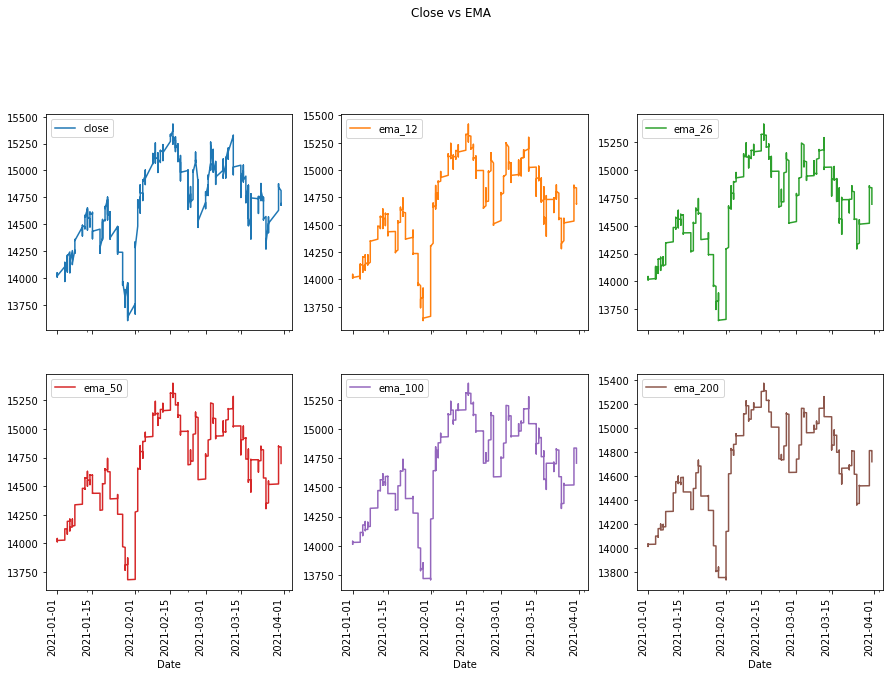

In [90]:
# Plot to view the same
df.plot(x = "Date", y = ['close', 'ema_12', 'ema_26', 'ema_50', 'ema_100', 'ema_200'] , subplots = True, layout = (3, 3), figsize = (15, 15), title = "Close vs EMA", rot = 90)

##### Corelation Matrix

<AxesSubplot:>

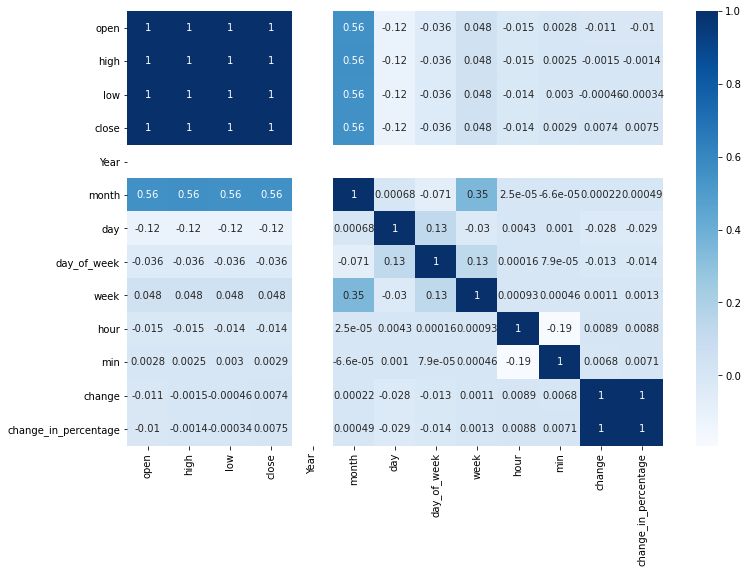

In [28]:
# corelation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True) 

<AxesSubplot:>

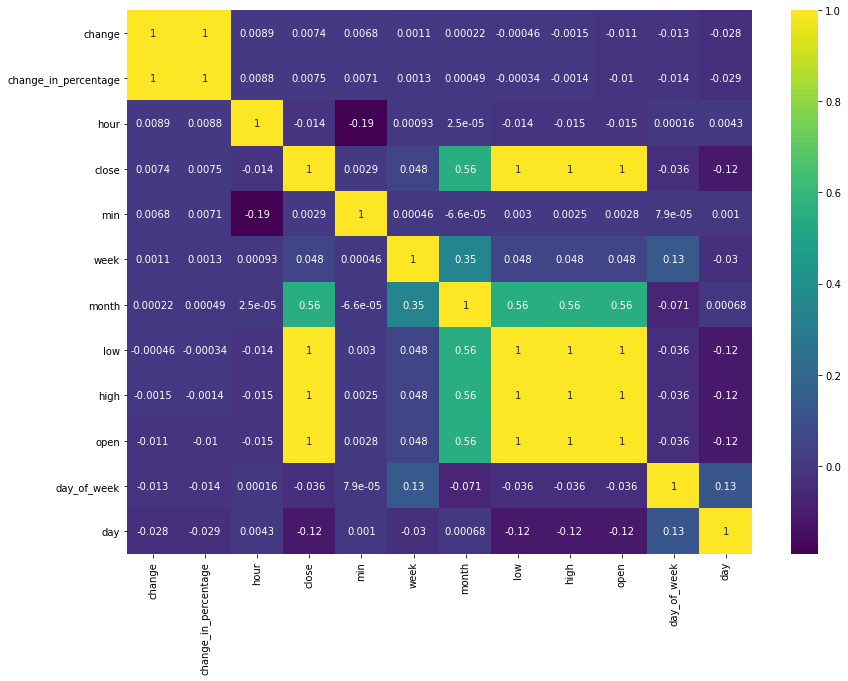

In [29]:
k = 13 #number of variables for heatmap
cols = df.corr().nlargest(k, 'change')['change'].index
cm = df[cols].corr()
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

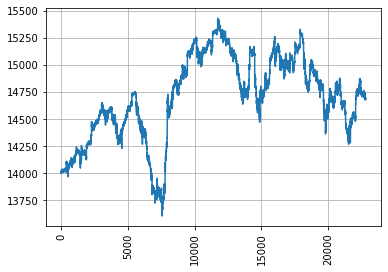

<Figure size 720x720 with 0 Axes>

In [30]:
plt.plot(df.index, df['open'])
plt.grid(True)
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.show()

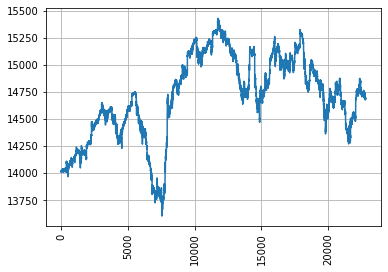

<Figure size 720x720 with 0 Axes>

In [31]:
plt.plot(df.index, df['close'])
plt.grid(True)
plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
plt.show()

##### Inshights : 
- Open and close both variables are highly corelated to each other as well to high and low 
- By looking at the visualization we can say that there is not much difference in the trends of the plots

#### Visualizing the skewness 

D:\Yas_PC\Currently Installed Softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Yas_PC\Currently Installed Softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Yas_PC\Currently Installed Softwares\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

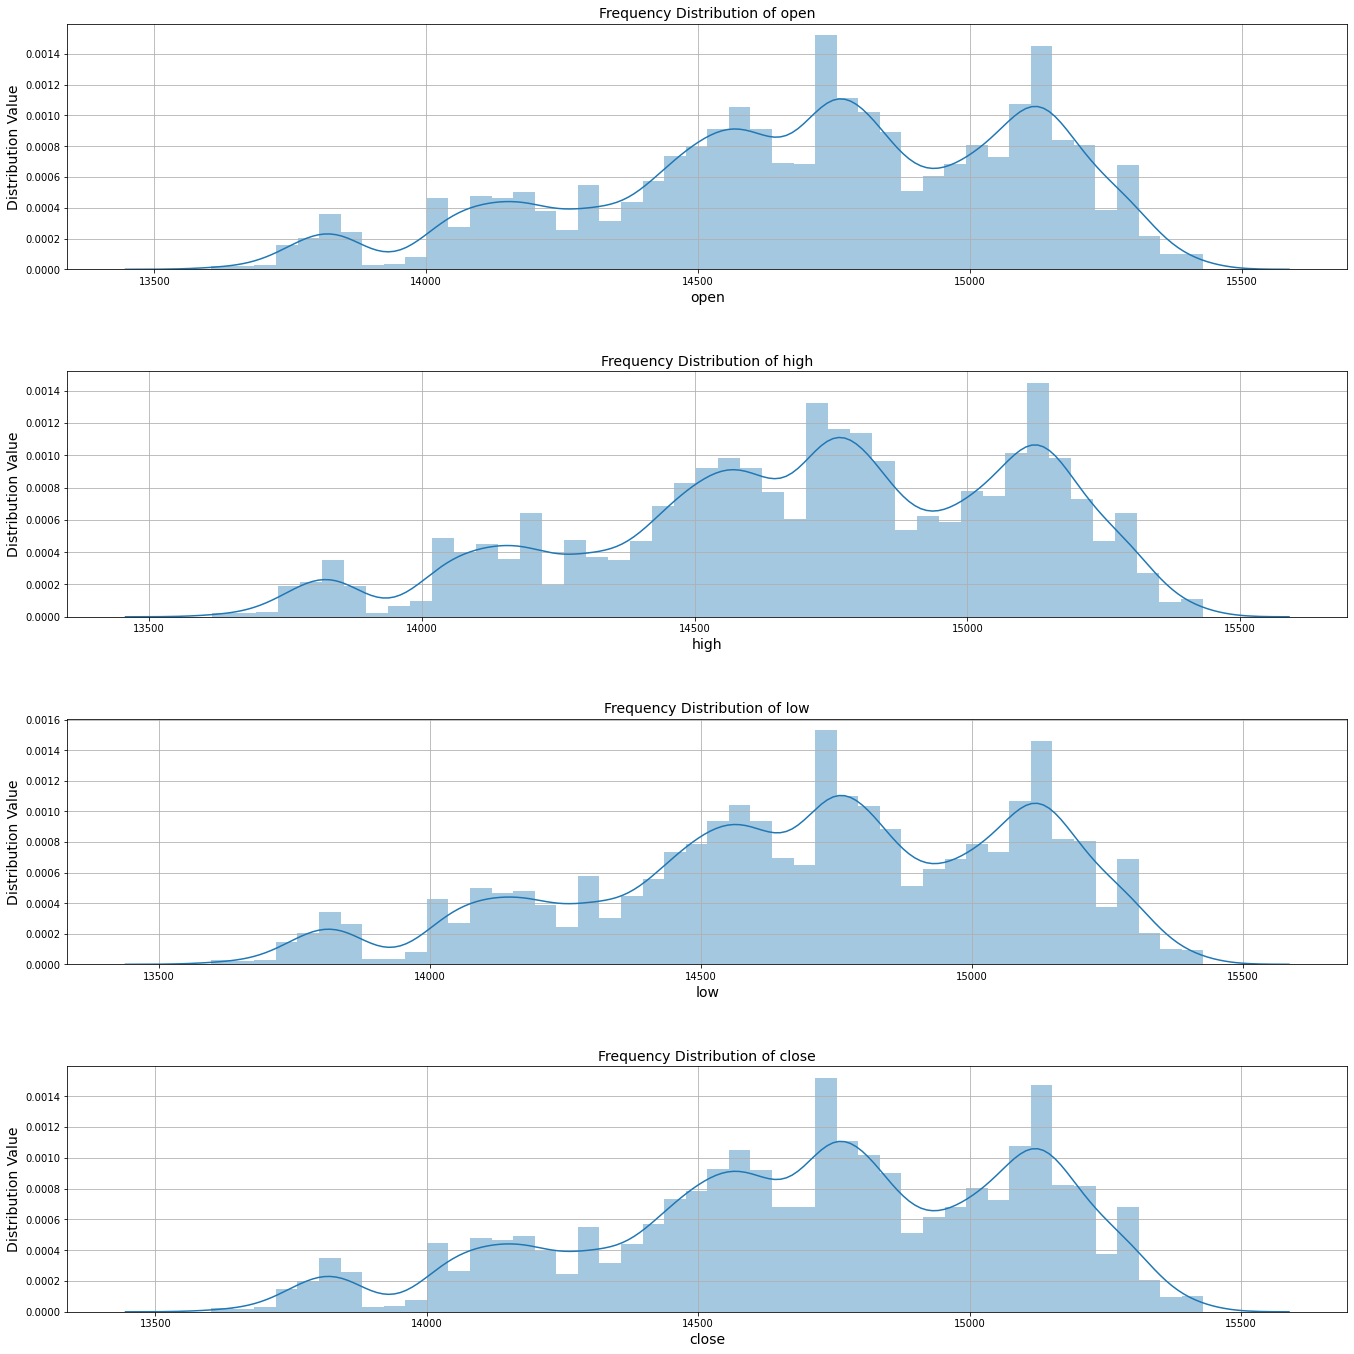

In [32]:
Column_List = ['open', 'high', 'low', 'close'] #We don't want to check other columns

fig, ax = plt.subplots(len(Column_List), figsize = (20, 20))

for i, col_list in enumerate(Column_List):
    sns.distplot(df[col_list], hist = True, ax = ax[i])
    ax[i].set_title ("Frequency Distribution of " + col_list, fontsize = 14)
    ax[i].set_xlabel (col_list, fontsize = 14)
    ax[i].set_ylabel ('Distribution Value', fontsize = 14)
    ax[i].grid('on') 
    fig.tight_layout (pad = 5) 
   

##### Inshights : Frequency distribution of the open, close, high & Low is pretty similar 

##### Outlier

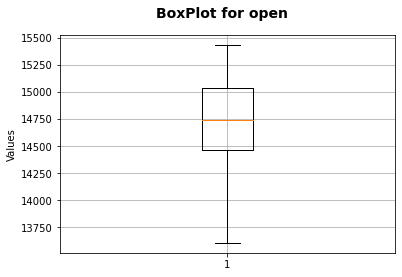

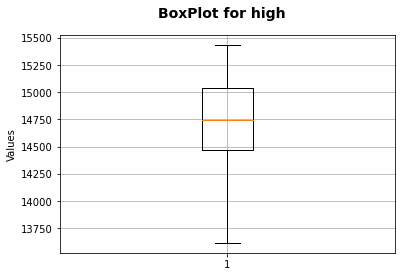

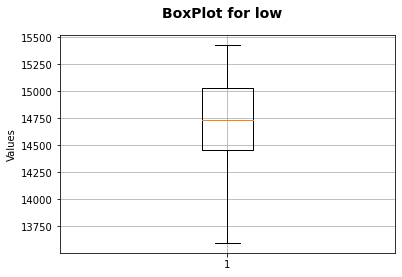

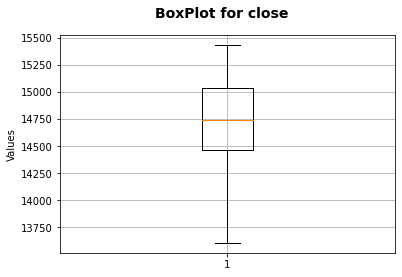

In [33]:
for i, col_list in enumerate(Column_List):
    fig = plt.figure()
    fig.suptitle('BoxPlot for '+col_list, fontsize=14, fontweight='bold')

    ax = fig.add_subplot(111)
    ax.boxplot(x=df[col_list])
    ax.set_ylabel('Values')
    ax.grid('on')
    plt.show()

##### Inshights : By looking at the boxplots, there's no/little difference in the similarity of the boxplots.

In [91]:
import pickle

In [92]:
pickle_out = open("niftydf.pickle","wb")
pickle.dump(df, pickle_out)
pickle_out.close()